In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#load csv data in dataframe

pull_happy = "../Data/World Happiness 2016.csv"

happy = pd.read_csv(pull_happy)


In [3]:
pull_region = "../Data/Country Region.csv"

Region = pd.read_csv(pull_region)
Region.head()
C_rename4 = {"Bolivia (Plurinational State of)":"Bolivia","Iran (Islamic Republic of)":"Iran","Cote d'Ivoire":"Ivory Coast",
"China, Hong Kong SAR":"Hong Kong","Lao People's Democratic Republic":"Laos","Syrian Arab Republic":"Syria",
"The former Yugoslav Republic of Macedonia":"Macedonia","Russian Federation":"Russia",
"Republic of Korea":"South Korea","Republic of Moldova":"Moldova","United Kingdom of Great Britain":"United Kingdom",
"United Republic of Tanzania":"Tanzania","United States of America":"United States","Viet Nam":"Vietnam",
"Venezuela (Bolivarian Republic of)":"Venezuela"}
Region2 = Region.replace(C_rename4)
happy_region = pd.merge(happy, Region2, how = "left")
happy_region.count()
output_data_file = "Happy_Region.csv"
happy_region.to_csv(output_data_file, index=False)


In [4]:
pull_coord = "../Clean Data/CoordinatesClean.csv"

Coord = pd.read_csv(pull_coord)
C_rename3 = {"Congo [Republic]":"Congo (Brazzaville)","Congo [DRC]":"Congo (Kinshasa)","Cote d'Ivoire":"Ivory Coast",
"Macedonia [FYROM]":"Macedonia","Myanmar [Burma]":"Myanmar"}
Coord2 = Coord.replace(C_rename3)
happy_region_coord = pd.merge(happy_region, Coord2, how = "inner")

output_data_file = "Happy_Region_Coord.csv"
happy_region_coord.to_csv(output_data_file, index=False)
happy_region_coord.count()


Country            154
Happiness Rank     154
Happiness Score    154
Region             154
Continent          154
Latitude           154
Longitude          154
dtype: int64

Text(0, 0.5, 'Longitude')

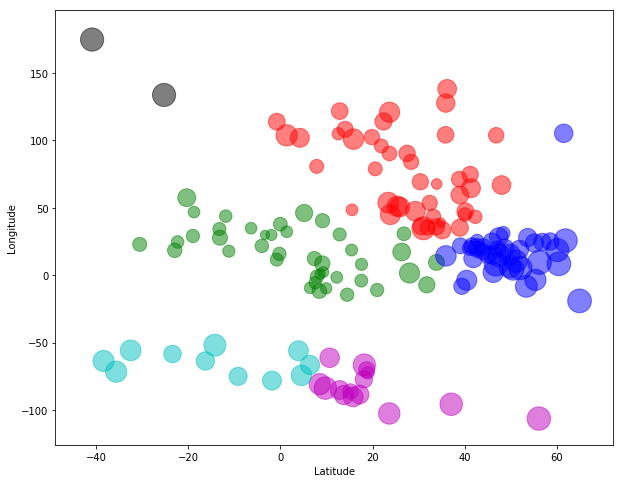

In [5]:
hrs_asia = happy_region_coord[happy_region_coord["Continent"]=="Asia"]
hrs_africa = happy_region_coord[happy_region_coord["Continent"]=="Africa"]
hrs_europe = happy_region_coord[happy_region_coord["Continent"]=="Europe"]
hrs_NA = happy_region_coord[happy_region_coord["Continent"]=="North America"]
hrs_SA = happy_region_coord[happy_region_coord["Continent"]=="South America"]
hrs_oceania = happy_region_coord[happy_region_coord["Continent"]=="Oceania"]

fig_scatter, ax_scatter = plt.subplots(figsize = (10,8))
ax_scatter.scatter(hrs_asia["Latitude"],hrs_asia["Longitude"], color = "r", s = (10*hrs_asia["Happiness Score"]**2), alpha = .5)
ax_scatter.scatter(hrs_africa["Latitude"],hrs_africa["Longitude"], color = "g",s = (10*hrs_africa["Happiness Score"]**2), alpha = .5)
ax_scatter.scatter(hrs_europe["Latitude"],hrs_europe["Longitude"], color = "b",s = (10*hrs_europe["Happiness Score"]**2), alpha = .5)
ax_scatter.scatter(hrs_NA["Latitude"],hrs_NA["Longitude"], color = "m", s = (10*hrs_NA["Happiness Score"]**2), alpha = .5)
ax_scatter.scatter(hrs_SA["Latitude"],hrs_SA["Longitude"], color = "c",s = (10*hrs_SA["Happiness Score"]**2), alpha = .5)
ax_scatter.scatter(hrs_oceania["Latitude"],hrs_oceania["Longitude"], color = "k",s = (10*hrs_oceania["Happiness Score"]**2), alpha = .5)
ax_scatter.set_xlabel("Latitude")
ax_scatter.set_ylabel("Longitude")
#happy_WAsia = happy_region_coord[happy_region_coord["Region"] == "Western Asia"]#
#fig_WAsia, ax_WAsia = plt.subplots(figsize = (10,5))
#plt.scatter(happy_region_coord["Latitude"])
#ax_WAsia = sns.violinplot(x = "Country",y = "Happiness Score", data = happy_WAsia,palette="muted")

In [6]:
column_names = ['Country1','Happiness Rank1','Happiness Score1','Latitude1','Longitude1',
        'Country2','Happiness Rank2','Happiness Score2','Latitude2','Longitude2','Latitude Distance',
        'Longitude Distance','Distance','Rank Difference','Score Difference']
#15
#distance = ['','','','','','','','','','','','','','','']
country1 = []
country2 = []
cont1 = []
cont2 = []
reg1 = []
reg2 = []
happysc1 = []
happysc2 = []
happyrk1 = []
happyrk2 = []
lat1 = []
lat2 = []
lng1 = []
lng2 = []

cntry = happy_region_coord["Country"]
for i,c1 in enumerate(cntry):
    for j,c2 in enumerate(cntry):
        country1.append(c1)
        country2.append(c2)
        cont1.append(happy_region_coord.iloc[i,4])
        cont2.append(happy_region_coord.iloc[j,4])
        reg1.append(happy_region_coord.iloc[i,3])
        reg2.append(happy_region_coord.iloc[j,3])
        happyrk1.append(happy_region_coord.iloc[i,1])
        happyrk2.append(happy_region_coord.iloc[j,1])
        happysc1.append(happy_region_coord.iloc[i,2])
        happysc2.append(happy_region_coord.iloc[j,2])
        lat1.append(happy_region_coord.iloc[i,5])
        lat2.append(happy_region_coord.iloc[j,5])
        lng1.append(happy_region_coord.iloc[i,6])
        lng2.append(happy_region_coord.iloc[j,6])
distancedf = pd.DataFrame({"Country1":country1,
                           "Country2":country2,
                           "Continent1":cont1,
                           "Continent2":cont2,
                           "Region1":reg1,
                           "Region2":reg2,
                          "Happiness Rank1":happyrk1,
                          "Happiness Rank2":happyrk2,
                          "Happiness Score1":happysc1,
                          "Happiness Score2":happysc2,
                          "Latitude1":lat1,
                          "Latitude2":lat2,
                          "Longitude1":lng1,
                          "Longitude2":lng2})
distancedf = distancedf[distancedf["Country1"] != distancedf["Country2"]]
distancedf["Latitude Distance"] = abs(distancedf["Latitude1"]-distancedf["Latitude2"])
distancedf["Longitude Distance"] = abs(distancedf["Longitude1"]-distancedf["Longitude2"])
distancedf["Distance"] = (distancedf["Latitude Distance"]**2+distancedf["Longitude Distance"]**2)**(1/2)
distancedf["Rank Difference"] = abs(distancedf["Happiness Rank1"]-distancedf["Happiness Rank2"])
distancedf["Score Difference"] = abs(distancedf["Happiness Score1"]-distancedf["Happiness Score2"])
distancedf.head()

Country1     Country2 Continent1     Continent2          Region1  \
1  Denmark  Switzerland     Europe         Europe  Northern Europe   
2  Denmark      Iceland     Europe         Europe  Northern Europe   
3  Denmark       Norway     Europe         Europe  Northern Europe   
4  Denmark      Finland     Europe         Europe  Northern Europe   
5  Denmark       Canada     Europe  North America  Northern Europe   

            Region2  Happiness Rank1  Happiness Rank2  Happiness Score1  \
1    Western Europe                1                2             7.526   
2   Northern Europe                1                3             7.526   
3   Northern Europe                1                4             7.526   
4   Northern Europe                1                5             7.526   
5  Northern America                1                6             7.526   

   Happiness Score2  Latitude1  Latitude2  Longitude1  Longitude2  \
1             7.509   56.26392  46.818188    9.501785    8.227512   
2             7.501   56.26392  64.963051    9.501785  -19.020835   
3             7.498   56.26392  60.472024    9.501785    8.468946   
4             7.413   56.26392  61.924110    9.501785   25.748151   
5             7.404   56.26392  56.130366    9.501785 -106.346771   

   Latitude Distance  Longitude Distance    Distance  Rank Difference  \
1           9.445732            1.274273    9.531297                1   
2           8.699131           28.522620   29.819704                2   
3           4.208104            1.032839    4.333001                3   
4           5.660190           16.246366   17.204132                4   
5           0.133554          115.848556  115.848633                5   

   Score Difference  
1             0.017  
2             0.025  
3             0.028  
4             0.113  
5             0.122

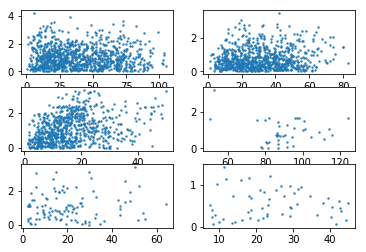

In [7]:

distance_europe = distancedf[(distancedf["Continent1"] == "Europe")]
distance_europe = distance_europe[distance_europe["Continent2"] == "Europe"]
distance_SA = distancedf[(distancedf["Continent1"] == "South America")]
distance_SA = distance_SA[distance_SA["Continent2"] == "South America"]
distance_NA = distancedf[(distancedf["Continent1"] == "North America")]
distance_NA = distance_NA[distance_NA["Continent2"] == "North America"]
distance_africa = distancedf[(distancedf["Continent1"] == "Africa")]
distance_africa = distance_africa[distance_africa["Continent2"] == "Africa"]
distance_asia = distancedf[(distancedf["Continent1"] == "Asia")]
distance_asia = distance_asia[distance_asia["Continent2"] == "Asia"]
close_europe = distance_europe[distance_europe["Distance"]<50]
far_europe = distance_europe[distance_europe["Distance"]>=50]

#fig, ax = plt.subplots()
#plt.figsize(5,10)
#plt.scatter(distance_asia["Distance"],distance_asia["Score Difference"], alpha = .5)
plt.subplot(3, 2, 1)
plt.scatter(distance_asia["Distance"],distance_asia["Score Difference"], s = 2, alpha = .5)

plt.subplot(3, 2, 2)
plt.scatter(distance_africa["Distance"],distance_africa["Score Difference"],s = 2, alpha = .5)

plt.subplot(3, 2, 3)
#plt.scatter(distance_europe["Distance"],distance_europe["Score Difference"],s = 2, alpha = .5)
plt.scatter(close_europe["Distance"],close_europe["Score Difference"],s = 2, alpha = .5)

plt.subplot(3, 2, 4)
plt.scatter(far_europe["Distance"],far_europe["Score Difference"],s = 2, alpha = .5)

plt.subplot(3, 2, 5)
plt.scatter(distance_NA["Distance"],distance_NA["Score Difference"],s = 2, alpha = .5)

plt.subplot(3, 2, 6)
plt.scatter(distance_SA["Distance"],distance_SA["Score Difference"],s = 2, alpha = .5)




In [8]:

from scipy import stats
as_slope, as_int, as_r, as_p, as_std_err = stats.linregress(
    distance_asia["Distance"], distance_asia["Score Difference"])
as_fit = as_slope * distance_asia["Distance"] + as_int
af_slope, af_int, af_r, af_p, af_std_err = stats.linregress(
    distance_africa["Distance"], distance_africa["Score Difference"])
af_fit = af_slope * distance_africa["Distance"] + af_int
eu_slope, eu_int, eu_r, eu_p, eu_std_err = stats.linregress(
    distance_europe["Distance"], distance_europe["Score Difference"])
eu_fit = eu_slope * distance_europe["Distance"] + eu_int
ceu_slope, ceu_int, ceu_r, ceu_p, ceu_std_err = stats.linregress(
    close_europe["Distance"], close_europe["Score Difference"])
ceu_fit = ceu_slope * close_europe["Distance"] + ceu_int
feu_slope, feu_int, feu_r, feu_p, feu_std_err = stats.linregress(
    far_europe["Distance"], far_europe["Score Difference"])
feu_fit = feu_slope * far_europe["Distance"] + feu_int
NA_slope, NA_int, NA_r, NA_p, NA_std_err = stats.linregress(
    distance_NA["Distance"], distance_NA["Score Difference"])
NA_fit = NA_slope * distance_NA["Distance"] + NA_int
SA_slope, SA_int, SA_r, SA_p, SA_std_err = stats.linregress(
    distance_SA["Distance"], distance_SA["Score Difference"])
SA_fit = SA_slope * distance_SA["Distance"] + SA_int
print(f"Asia: {as_r}, africa: {af_r}, Europe: {eu_r}, Close Europe: {ceu_r}, Far Europe: {feu_r}, North America: {NA_r}, South America: {SA_r}")

Asia: -0.036528309431952295, africa: 0.11025949109792046, Europe: 0.091676857197433, Close Europe: 0.3155349349362922, Far Europe: -0.14096822818747928, North America: 0.10948196765169216, South America: -0.026937410574572013


In [9]:
far_europe

Country1                Country2 Continent1 Continent2  \
55                    Denmark                  Russia     Europe     Europe   
209               Switzerland                  Russia     Europe     Europe   
362                   Iceland                 Moldova     Europe     Europe   
363                   Iceland                  Russia     Europe     Europe   
428                   Iceland                 Ukraine     Europe     Europe   
517                    Norway                  Russia     Europe     Europe   
671                   Finland                  Russia     Europe     Europe   
979               Netherlands                  Russia     Europe     Europe   
1441                   Sweden                  Russia     Europe     Europe   
1749                  Austria                  Russia     Europe     Europe   
2365                  Germany                  Russia     Europe     Europe   
2673                  Belgium                  Russia     Europe     Europe   
2827                  Ireland                  Russia     Europe     Europe   
2981               Luxembourg                  Russia     Europe     Europe   
3443           United Kingdom                  Russia     Europe     Europe   
4059           Czech Republic                  Russia     Europe     Europe   
4521                    Malta                  Russia     Europe     Europe   
4829                   France                  Russia     Europe     Europe   
5599                    Spain                  Russia     Europe     Europe   
6831                 Slovakia                  Russia     Europe     Europe   
7601                    Italy                  Russia     Europe     Europe   
8318                  Moldova                 Iceland     Europe     Europe   
8371                  Moldova                  Russia     Europe     Europe   
8470                   Russia                 Denmark     Europe     Europe   
8471                   Russia             Switzerland     Europe     Europe   
8472                   Russia                 Iceland     Europe     Europe   
8473                   Russia                  Norway     Europe     Europe   
8474                   Russia                 Finland     Europe     Europe   
8476                   Russia             Netherlands     Europe     Europe   
8479                   Russia                  Sweden     Europe     Europe   
...                       ...                     ...        ...        ...   
8554                   Russia                  Serbia     Europe     Europe   
8555                   Russia  Bosnia and Herzegovina     Europe     Europe   
8556                   Russia              Montenegro     Europe     Europe   
8559                   Russia                 Hungary     Europe     Europe   
8562                   Russia                Portugal     Europe     Europe   
8563                   Russia               Macedonia     Europe     Europe   
8566                   Russia                  Greece     Europe     Europe   
8576                   Russia                 Albania     Europe     Europe   
8590                   Russia                 Ukraine     Europe     Europe   
8596                   Russia                Bulgaria     Europe     Europe   
8679                   Poland                  Russia     Europe     Europe   
9141                Lithuania                  Russia     Europe     Europe   
9295                  Belarus                  Russia     Europe     Europe   
9449                 Slovenia                  Russia     Europe     Europe   
10219                  Latvia                  Russia     Europe     Europe   
10681                 Romania                  Russia     Europe     Europe   
10835                 Estonia                  Russia     Europe     Europe   
11143                 Croatia                  Russia     Europe     Europe   
11605                  Kosovo                  Russia     Europe     Eu

In [100]:
import gmaps
import gmaps.geojson_geometries
gmaps.configure(api_key=gkey)

countries_geojson = gmaps.geojson_geometries.load_geometry('countries')

fig = gmaps.figure()

gini_layer = gmaps.geojson_layer(countries_geojson)
fig.add_layer(gini_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [120]:


from matplotlib.cm import viridis
from matplotlib.cm import RdBu
from matplotlib.cm import jet
from matplotlib.colors import to_hex

# We will need to scale the happiness score values to lie between 0 and 1
min_hap = min(happy["Happiness Score"])
max_hap = max(happy["Happiness Score"])
hap_range = max_hap - min_hap

def calculate_color(hap):
    """
    Convert the Happiness Score to a color
    """
    # make gini a number between 0 and 1
    normalized_hap = (hap - min_hap) / hap_range

    # invert happiness score so that high inequality gives dark color
    inverse_hap = 1.0 - normalized_hap

    # transform the happiness score to a matplotlib color
    #mpl_color = viridis(inverse_hap)
    #mpl_color = RdBu(normalized_hap)
    mpl_color = jet(inverse_hap)
    # transform from a matplotlib color to a valid CSS color
    gmaps_color = to_hex(mpl_color, keep_alpha=False)

    return gmaps_color

In [121]:
#happy_region_coord2 = happy_region_coord.set_index("Country")
happy_region_coord2 = happy.set_index("Country")
happy_region_coord2.head()

Happiness Rank  Happiness Score
Country                                     
Denmark                   1            7.526
Switzerland               2            7.509
Iceland                   3            7.501
Norway                    4            7.498
Finland                   5            7.413

In [122]:
country_list_df = pd.DataFrame(country_list, columns = ["Country"])
check = [1 for c in country_list_df["Country"]]
country_list_df["Check"] = check
#country_list_df.rename(columns = ("Country"))
country_list_df.head()
happy_to_merge = happy.replace({"United States":"United States of America","Hong Kong":"Hong Kong S.A.R.",
                                "Somaliland Region":"Somaliland","Congo (Kinshasa)":"Democratic Republic of the Congo",
                                "Congo (Brazzaville)":"Republic of Congo","Palestinian Territories":"Palestine",
                                "Tanzania":"United Republic of Tanzania","Serbia":"Republic of Serbia",
                                "North Cyprus":"Northern Cyprus"})

gmap_country = pd.merge(happy_to_merge, country_list_df, on = "Country", how = "left")
output_data_file = "Happy_gmap.csv"
gmap_country.to_csv(output_data_file, index=False)
gmap_country.count()

Country            157
Happiness Rank     157
Happiness Score    157
Check              157
dtype: int64

In [123]:
gmap_country_score = gmap_country.set_index("Country")
colors = []
country_list = []
for feature in countries_geojson['features']:
    country_name = feature['properties']['name']
    try:
#       hap = happy_region_coord.loc[country, "Happiness Score"]
        hap = gmap_country_score.loc[country_name, "Happiness Score"]
        color = calculate_color(hap)
    except KeyError:
        # no happiness for that country: return default color
        color = (0, 0, 0, 0.3)
    colors.append(color)
    country_list.append(country_name)

In [124]:
gmap_country_score["Happiness Score"].max()


7.526

In [125]:
fig = gmaps.figure()
happy_layer = gmaps.geojson_layer(
    countries_geojson,
    fill_color=colors,
    stroke_color=colors,
    fill_opacity=0.8)
    #colorbar=dict(nticks=8, tickmode='array',tickvals=[2, 4, 6, 8]))
fig.add_layer(happy_layer)
#plt.colorbar()
fig


Figure(layout=FigureLayout(height='420px'))

In [132]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

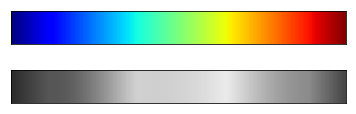

In [135]:
view_colormap(jet)
plt.savefig("colorbar.png")